<a href="https://colab.research.google.com/github/alvinwalker314/AlvinWalker-DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [200]:
#Merged cellphones and population
cell_population= pd.merge(cell_phones, population)
cell_population.head()
cell_population.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
#Merged geo and country columns with cell_population
geo_country= geo_country_codes.loc[1: ,['geo', 'country']]
df= pd.merge(cell_population, geo_country)


***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [202]:
#Created a new column called cell per person that divides the total cell phones with the total population
df['cell_per_person']= df['cell_phones_total']/ df['population_total']
#Checking if data matches
united_states= df[df['country']== 'United States']
united_states[united_states['time']== 2017]


,geo,time,cell_phones_total,population_total,country,cell_per_person
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [204]:
#changed all geo values to uppercase
df['geo']= df['geo'].str.upper()
df['geo']


0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
5       AFG
6       AFG
7       AFG
8       AFG
9       AFG
10      AFG
11      AFG
12      AFG
13      AFG
14      AFG
15      AFG
16      AFG
17      AFG
18      AFG
19      AFG
20      AFG
21      AFG
22      AFG
23      AFG
24      AFG
25      AFG
26      AFG
27      AFG
28      AFG
29      AFG
       ... 
8560    ZWE
8561    ZWE
8562    ZWE
8563    ZWE
8564    ZWE
8565    ZWE
8566    ZWE
8567    ZWE
8568    ZWE
8569    ZWE
8570    ZWE
8571    ZWE
8572    ZWE
8573    ZWE
8574    ZWE
8575    ZWE
8576    ZWE
8577    ZWE
8578    ZWE
8579    ZWE
8580    ZWE
8581    ZWE
8582    ZWE
8583    ZWE
8584    ZWE
8585    ZWE
8586    ZWE
8587    ZWE
8588    ZWE
8589    ZWE
Name: geo, Length: 8590, dtype: object

***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [35]:
#sound top 5 countries with most cell phones
china= df[df['cell_phones_total']== 1474097000]
india= df[df['cell_phones_total']== 1168902277]
indonesia= df[df['cell_phones_total']== 458923202]
united_states_cell= df[df['cell_phones_total']== 395881000]
brazil= df[df['cell_phones_total']== 236488548]
#created a top 5 df
top5= pd.concat([china,india, indonesia, united_states_cell, brazil])
#dropped unnessesary data
top5.drop(8133)

,geo,time,cell_phones_total,population_total,country,cell_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [38]:
#found the first time united states cell phone total was higher than population
year_2014= united_states[united_states['cell_phones_total'] > united_states['population_total']]

,geo,time,cell_phones_total,population_total,country
8131,usa,2014,"355,500,000.0",317718779,United States
8132,usa,2015,"382,307,000.0",319929162,United States
8133,usa,2016,"395,881,000.0",322179605,United States
8134,usa,2017,"395,881,000.0",324459463,United States


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

#function to allow me to get all percentages for all years
def get_percentages(data, year):
    temp= data[data['Year']== year]
    total= temp['Occupation'].count()
    acm= temp[temp['Occupation']== 'Acting, Comedy & Music']
    media= temp[temp['Occupation']== 'Media']
    gov_and_pol= temp[temp['Occupation']== 'Government and Politics']
    other= temp[temp['Occupation']== 'Other']
    acm_count= acm['Occupation'].count()
    media_count= media['Occupation'].count()
    gov_and_pol_count= gov_and_pol['Occupation'].count()
    other_count= other['Occupation'].count()
    acm_perct= (acm_count / total) * 100
    media_perct= (media_count / total) * 100
    gov_and_pol_perct= (gov_and_pol_count / total) * 100
    other_perct= (other_count / total) * 100
    return acm_perct, media_perct, gov_and_pol_perct, other_perct
#created a percent data dictionary  
percent_data={}

# acm_percent_data={}
# media_percent_data= {}
# gov_and_pol_percent_data= {}
# other_percent_data= {}

#iterated through all years and used function to add data to percent data
for years in range(1999, 2016):
  percent_data[years]= get_percentages(df, years)
#   acm_percent_data[years]= get_percentages(df, years)[0]
#   media_percent_data[years]= get_percentages(df, years)[1]
#   gov_and_pol_percent_data[years]= get_percentages(df, years)[2]
#   other_percent_data[years]= get_percentages(df, years)[3]

# acm_df= pd.DataFrame.from_dict(acm_percent_data, orient= 'index')
# media_df= pd.DataFrame.from_dict(media_percent_data, orient= 'index')
# gov_and_pol_df= pd.DataFrame.from_dict(gov_and_pol_percent_data, orient= 'index')
# other_df= pd.DataFrame.from_dict(other_percent_data, orient= 'index')

#made percent data a dataframe and renamed columns
finished= pd.DataFrame.from_dict(percent_data, orient= 'index')
finished.rename(columns= {0:'acm%', 1: 'media%', 2: 'gov and pol%', 3: 'other%'})



,acm%,media%,gov and pol%,other%
1999,90.36144578313254,6.626506024096386,1.2048192771084338,1.8072289156626504
2000,73.96449704142012,12.42603550295858,8.284023668639055,5.325443786982249
2001,72.61146496815286,19.745222929936308,3.821656050955414,3.821656050955414
2002,62.264150943396224,26.41509433962264,6.918238993710692,4.40251572327044
2003,56.024096385542165,24.69879518072289,10.240963855421686,9.036144578313253
2004,38.41463414634146,27.439024390243905,22.5609756097561,11.585365853658537
2005,37.03703703703704,33.33333333333333,16.049382716049383,13.580246913580247
2006,36.024844720496894,29.19254658385093,19.25465838509317,15.527950310559005
2007,25.53191489361702,33.33333333333333,17.02127659574468,24.113475177304963
2008,20.73170731707317,46.95121951219512,20.121951219512198,12.195121951219512


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

### Part 2 — Recreate this explanatory visualization:

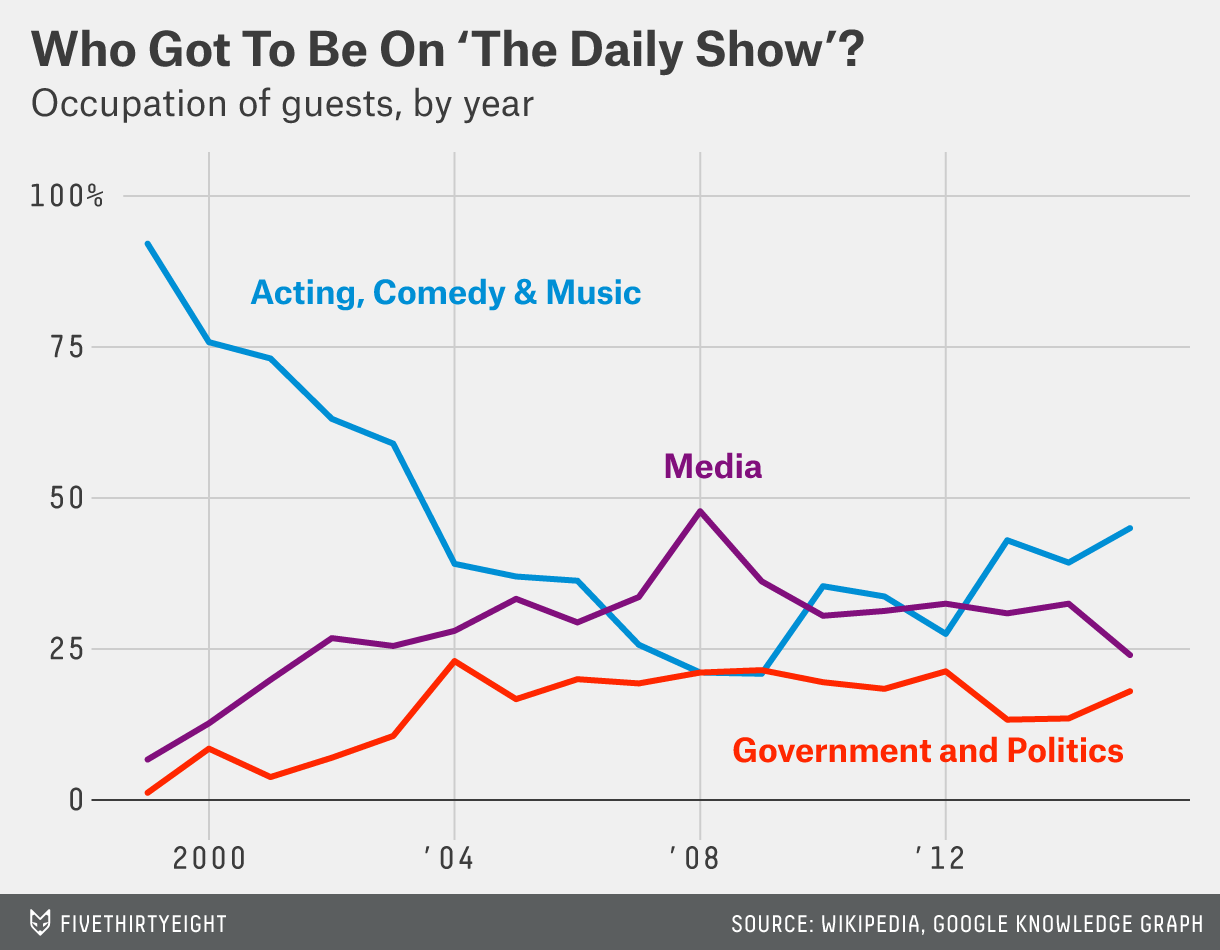

In [55]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

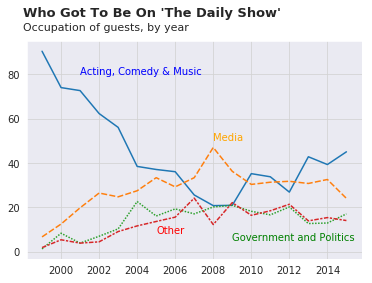

In [206]:
#import seaborn and added text
import seaborn as sns
plt.text(x= 1998, y= 106, s= "Who Got To Be On 'The Daily Show'", weight= 'bold', size= 13)
plt.text(x= 1998, y= 100, s= "Occupation of guests, by year", size= 11);
plt.text(x= 2009, y= 5, s='Government and Politics', color='green')
plt.text(x= 2008, y= 50, s= 'Media', color='orange')
plt.text(x= 2001, y= 80, s= 'Acting, Comedy & Music', color= 'blue')
plt.text(x= 2005, y= 8, s= 'Other', color= 'red')
#plotted data
sns.lineplot(data= finished, legend= False)
plt.grid(axis= 'both', color= 'lightgray')



### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)